Before using keras trying to explain the process using sklearns regression model in a simple form.
https://realpython.com/python-keras-text-classification/


In [1]:
import pandas as pd

In [4]:
# Creating a dictionary object of the filepath
path = "/home/arindam/Documents/mygithub/bu_dsc/data/processed/sentiment labelled sentences/"

filepath_dict = {'yelp': path +'yelp_labelled.txt',
                'amazon': path + 'amazon_cells_labelled.txt',
                'imdb': path + 'imdb_labelled.txt' }

df_list=[]
for source,filepath in filepath_dict.items():
    df = pd.read_csv(filepath, names=['sentence','label'], sep = '\t')
    df['source'] = source # This column is added to track the file source name
    df_list.append(df)

data = pd.concat(df_list)
data.shape

(2748, 3)

In [5]:
data.head

<bound method NDFrame.head of                                               sentence  label source
0                             Wow... Loved this place.      1   yelp
1                                   Crust is not good.      0   yelp
2            Not tasty and the texture was just nasty.      0   yelp
3    Stopped by during the late May bank holiday of...      1   yelp
4    The selection on the menu was great and so wer...      1   yelp
..                                                 ...    ...    ...
743  I just got bored watching Jessice Lange take h...      0   imdb
744  Unfortunately, any virtue in this film's produ...      0   imdb
745                   In a word, it is embarrassing.        0   imdb
746                               Exceptionally bad!        0   imdb
747  All in all its an insult to one's intelligence...      0   imdb

[2748 rows x 3 columns]>

In [7]:
data.iloc[5].sentence

'Now I am getting angry and I want my damn pho.'

In [8]:
data.iloc[5]

sentence    Now I am getting angry and I want my damn pho.
label                                                    0
source                                                yelp
Name: 5, dtype: object

In [20]:
sample_sentences = data.iloc[10:13].sentence
sample_sentences

10                             Service was very prompt.
11                                   Would not go back.
12    The cashier had no care what so ever on what I...
Name: sentence, dtype: object

'''
How do we plan to predict the sentiment?
    1) Count the frequency of each word in a sentence
    2) tie this count back to the entire set of words in the data set
    3) create a vocabulary of all the words in all the sentences - called corpus in NLP
    4) create a vector for each sentence
    5) take the sentence you want to vectorize and count each occurrance of the word in the vocabulary - called feature vector
'''

In [21]:
'''
vocabulary is a list of words that occurred in our text where each word has its own index
'''
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=0, lowercase=False)
vectorizer.fit(sample_sentences)
vectorizer.vocabulary_

{'Service': 0,
 'was': 23,
 'very': 22,
 'prompt': 16,
 'Would': 2,
 'not': 13,
 'go': 9,
 'back': 3,
 'The': 1,
 'cashier': 6,
 'had': 10,
 'no': 12,
 'care': 5,
 'what': 25,
 'so': 18,
 'ever': 8,
 'on': 14,
 'to': 20,
 'say': 17,
 'it': 11,
 'still': 19,
 'ended': 7,
 'up': 21,
 'being': 4,
 'wayyy': 24,
 'overpriced': 15}

In [22]:
vectorizer.transform(sample_sentences).toarray()

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        1, 1, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0],
       [0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
        0, 0, 1, 2]])

In [23]:
vectorizer.get_feature_names()

['Service',
 'The',
 'Would',
 'back',
 'being',
 'care',
 'cashier',
 'ended',
 'ever',
 'go',
 'had',
 'it',
 'no',
 'not',
 'on',
 'overpriced',
 'prompt',
 'say',
 'so',
 'still',
 'to',
 'up',
 'very',
 'was',
 'wayyy',
 'what']

In [24]:
# Convert to a dataframe
df1 = pd.DataFrame(vectorizer.transform(sample_sentences).toarray(), columns=vectorizer.get_feature_names())
df1

,Service,The,Would,back,being,care,cashier,ended,ever,go,...,prompt,say,so,still,to,up,very,was,wayyy,what
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,1,1,1,1,1,0,...,0,1,1,1,1,1,0,0,1,2


In [25]:
# Defining a baseline model
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
df_yelp = data[data['source']=='yelp']

sentences = df_yelp['sentence'].values
y = df_yelp['label'].values

sentences_train,sentences_test,y_train,y_test = train_test_split(sentences,y,test_size=0.25, random_state=1000)

In [26]:
print("Total Set: ", df_yelp.shape[0])
print("Training Set: ", len(sentences_train))
print("Testing Set: ", len(sentences_test))

Total Set:  1000
Training Set:  750
Testing Set:  250


In [27]:
'''
How we will be using the BOW model to vectorize the sentences. In some cases you might not have the testing data available
during the training so creating the vocabulary using only the training data.
'''
from sklearn.feature_extraction.text import CountVectorizer
# vectorizer = CountVectorizer(lowercase=True)
vectorizer = CountVectorizer()
vectorizer.fit(sentences_train) # vocabulary using only the training data

X_train = vectorizer.transform(sentences_train)
X_test = vectorizer.transform(sentences_test)

In [28]:
print("Training features: ", X_train.shape[1])
print("Testing features: ", X_test.shape[1])
print("Using the same Training vocabulary")

Training features:  1714
Testing features:  1714
Using the same Training vocabulary


In [29]:
'''
CountVectorizer performs tokenization which separates the sentences into a set of tokens. The Classification model we are going to consider here is the logistic regression. It is simple yet a powerful linear model.
'''

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

score = classifier.score(X_test, y_test)
print("Accuracy:", score)

Accuracy: 0.796


In [31]:
data.shape

(2748, 3)

In [36]:
data['source'].value_counts()

amazon    1000
yelp      1000
imdb       748
Name: source, dtype: int64

In [41]:
# Now let us see how the model performs on the other data sets we have
for source in data['source'].unique():
    df_source = data[data['source']==source]
    sentences = df_source['sentence'].values
    y = df_source['label'].values

    # split the data into training and test set
    sentences_train,sentences_test,y_train,y_test = train_test_split(sentences,y,test_size=0.25, random_state=1000)
    vectorizer = CountVectorizer()
    vectorizer.fit(sentences_train) # vocabulary using only the training data

    X_train = vectorizer.transform(sentences_train)
    X_test = vectorizer.transform(sentences_test)    

    classifier = LogisticRegression()
    classifier.fit(X_train, y_train)

    score = classifier.score(X_test, y_test)
    
    print("Training set for {} is {}".format(source, len(sentences_train)))
    print("Testing set for {} is {}".format(source, len(sentences_test)))
    print("Accuracy score for {} is {}".format(source,score))
    print("=====================")

    print("Feature Vector for {} is {}".format(source, X_train.shape[1]))
    print("=====================")

Training set for yelp is 750
Testing set for yelp is 250
Accuracy score for yelp is 0.796
Feature Vector for yelp is 1714
Training set for amazon is 750
Testing set for amazon is 250
Accuracy score for amazon is 0.796
Feature Vector for amazon is 1546
Training set for imdb is 561
Testing set for imdb is 187
Accuracy score for imdb is 0.7486631016042781
Feature Vector for imdb is 2505


In [3]:
'''
# writing a classifier to classify topics
# Using the reuters dataset from keras dataset for that
'''


'\nwriting a classifier to classify topics\nUsing the reuters dataset from keras dataset for that\n'

In [38]:
from keras.models import Sequential
from keras import layers

input_dim = X_train.shape[1] # Number of features

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [39]:
# Configure the learning process
# This .compile method specifies the optimizer and the loss function
model.compile(loss='binary_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                25060     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 25,071
Trainable params: 25,071
Non-trainable params: 0
_________________________________________________________________


In [42]:
# Training the model with .fit function
# Each completed iterations are commonly called epochs
# batch size is responsible for how many samples we want to use in one epoch
history = model.fit(X_train, y_train,
                    epochs = 20,
                    verbose=True,
                    validation_data=(X_test,y_test),
                    batch_size=10)

Epoch 1/100
57/57 [==============================] - 3s 57ms/step - loss: 0.6931 - accuracy: 0.5615 - val_loss: 0.7064 - val_accuracy: 0.5936
Epoch 2/100
57/57 [==============================] - 3s 53ms/step - loss: 0.6447 - accuracy: 0.8253 - val_loss: 0.6744 - val_accuracy: 0.6845
Epoch 3/100
57/57 [==============================] - 3s 57ms/step - loss: 0.5791 - accuracy: 0.9037 - val_loss: 0.6664 - val_accuracy: 0.6952
Epoch 4/100
57/57 [==============================] - 3s 51ms/step - loss: 0.4867 - accuracy: 0.9483 - val_loss: 0.6092 - val_accuracy: 0.7166
Epoch 5/100
57/57 [==============================] - 3s 46ms/step - loss: 0.3936 - accuracy: 0.9590 - val_loss: 0.6077 - val_accuracy: 0.7326
Epoch 6/100
57/57 [==============================] - 3s 50ms/step - loss: 0.3142 - accuracy: 0.9733 - val_loss: 0.5443 - val_accuracy: 0.7540
Epoch 7/100
57/57 [==============================] - 3s 50ms/step - loss: 0.2532 - accuracy: 0.9786 - val_loss: 0.5585 - val_accuracy: 0.7487
Epoch 

In [43]:
# rerunning the .fit method will start off with the computed weights from the previous training
from keras.backend import clear_session
clear_session()

In [44]:
# Evaluate the accuracy of the model
loss, accuracy = model.evaluate(X_train, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))

loss, accuracy = model.evaluate(X_test, y_test, verbose=True)
print("Testing Accuracy: {:.4f}".format(accuracy))

18/18 [==============================] - 0s 14ms/step - loss: 0.0015 - accuracy: 1.0000
Training Accuracy: 1.0000
6/6 [==============================] - 0s 17ms/step - loss: 0.9658 - accuracy: 0.7807
Testing Accuracy: 0.7807


In [52]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

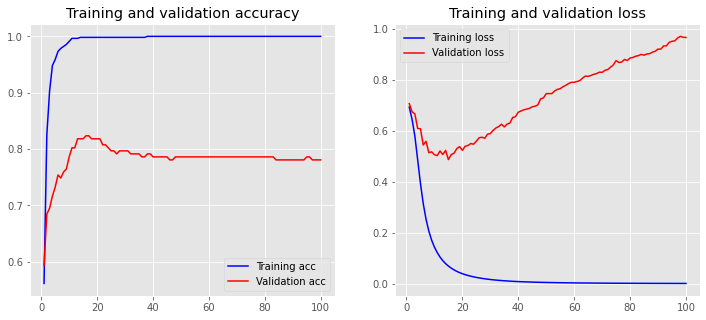

In [53]:
plot_history(history)